In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm


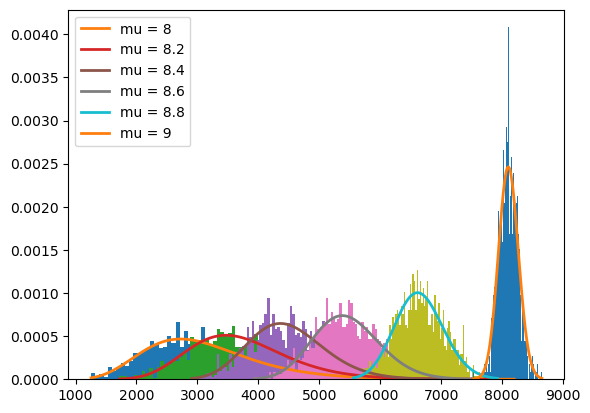

In [29]:
# mu = 8  # Mean of the logarithm of the variable
# sigma = 0.3  # Standard deviation of the logarithm of the variable

mus = [8, 8.2, 8.4, 8.6, 8.8, 9]  # Mean of the logarithm of the variable += 2
sigmas = [0.3, 0.28, 0.26, 0.24, 0.22, 0.2]  # Standard deviation of the logarithm of the variable

for mu, sigma in zip(mus, sigmas): 
    s = np.random.lognormal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
        / (x * sigma * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, label='mu = {}'.format(mu))
plt.legend()
plt.show()
